## Import Packages

In [5]:
from functools import partial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

from scikeras.wrappers import KerasClassifier, KerasRegressor

## Constants

In [6]:
ADMISSIONS_CSV_PATH:str="regression-challenge-starter/admissions_data.csv"
RANDOM_STATE:int = 66
TARGET_COL:str = "Chance of Admit "


Load data

In [7]:
admissions_df = pd.read_csv(ADMISSIONS_CSV_PATH)

Split into features/labels

In [8]:
admissions_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
features_df = admissions_df.copy()
labels = features_df.pop(TARGET_COL)

Split into train/test

In [10]:
# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features_df, labels, test_size=0.2, random_state=RANDOM_STATE)

Create model function

In [11]:
def build_nn_model(n_features:int):
    model = keras.Sequential()
    model.add(keras.layers.Input(n_features))
    model.add(keras.layers.Dense(16, activation="relu"))
    model.add(keras.layers.Dense(1))
    opt = keras.optimizers.Adam(learning_rate = 0.01)
    model.compile(loss='mse',  metrics=['mae','mse'], optimizer=opt)
    return model
    

In [33]:
model_func = partial(build_nn_model, n_features=train_features.shape[1])
nn_model = KerasRegressor(build_fn=model_func, epochs=100, batch_size=32, verbose=2)

In [34]:
pipeline = Pipeline([('scaler', StandardScaler()), ('nn', nn_model)])
pipeline.fit(train_features, train_labels)

Epoch 1/100


/home/codespace/.python/current/lib/python3.10/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


13/13 - 0s - loss: 0.3444 - mae: 0.4640 - mse: 0.3444 - 392ms/epoch - 30ms/step
Epoch 2/100
13/13 - 0s - loss: 0.1000 - mae: 0.2457 - mse: 0.1000 - 14ms/epoch - 1ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0445 - mae: 0.1709 - mse: 0.0445 - 14ms/epoch - 1ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0278 - mae: 0.1318 - mse: 0.0278 - 15ms/epoch - 1ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0198 - mae: 0.1098 - mse: 0.0198 - 14ms/epoch - 1ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0173 - mae: 0.1010 - mse: 0.0173 - 14ms/epoch - 1ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0130 - mae: 0.0894 - mse: 0.0130 - 22ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0107 - mae: 0.0803 - mse: 0.0107 - 15ms/epoch - 1ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0092 - mae: 0.0746 - mse: 0.0092 - 15ms/epoch - 1ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0088 - mae: 0.0732 - mse: 0.0088 - 14ms/epoch - 1ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0076 - mae: 0.0671 - mse: 0.0076 - 15ms/epoch - 1ms/step
Epoch 12/100
13/13

Pipeline(steps=[('scaler', StandardScaler()),
                ('nn',
                 KerasRegressor(batch_size=32, build_fn=functools.partial(<function build_nn_model at 0x7fd61d1949d0>, n_features=8), epochs=100, verbose=2))])

In [30]:
predictions = pipeline.predict(test_features)
r2 = r2_score(test_labels, predictions)

4/4 - 0s - 40ms/epoch - 10ms/step


<AxesSubplot: >

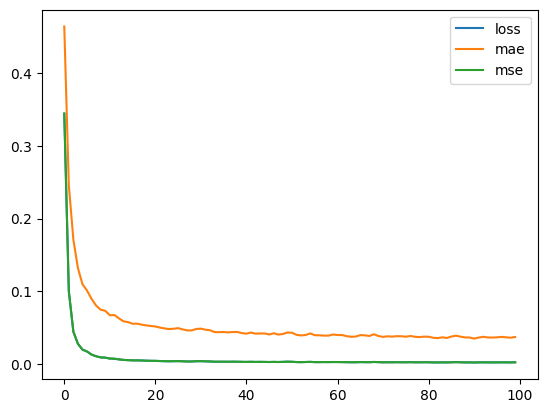

In [49]:
pd.DataFrame(pipeline._final_estimator.model_.history.history).plot()